# Taller Ciencia Viva 2024 - Departamento de Computación #
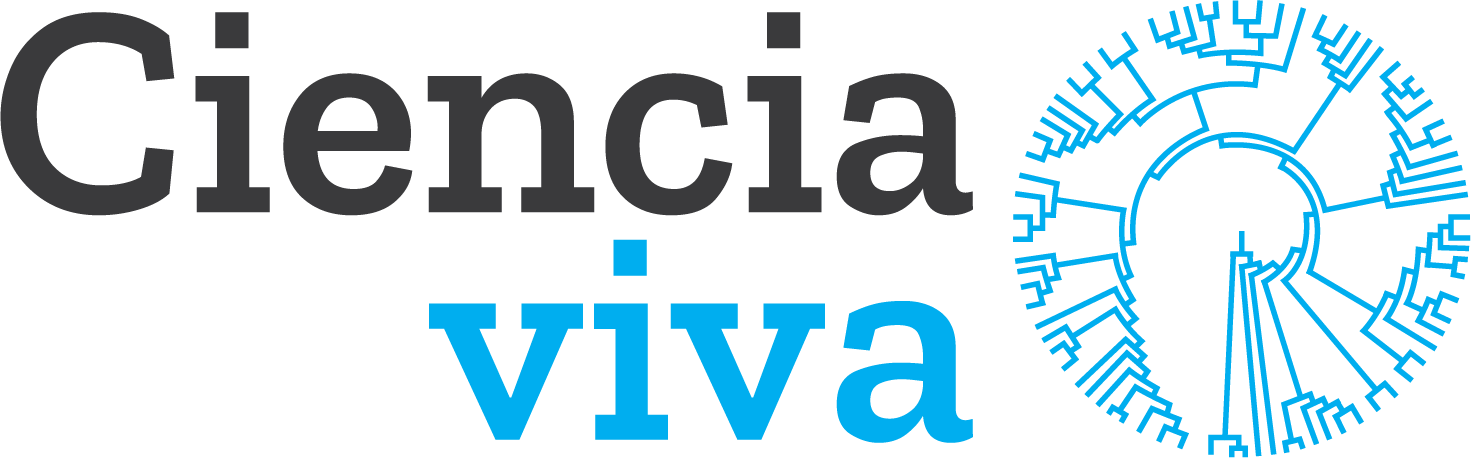
## Inteligencia Artificial ##

### Objetivo: Hacer un clasificador de figuras en tiempo real.

Durante este taller se van a utilizar las siguientes bibliotecas:

-  __[OpenCV](https://opencv.org/)__ : la utilizaremos para realizar el procesamiento de las imágenes
-  __[scikit-learn](https://scikit-learn.org/stable/)__ : la utilizaremos para importar distintos algoritmos de aprendizaje supervisado y obtener herramientas para obtener métricas de nuestros resultados.
-  __[numpy](https://numpy.org/)__ : la utilizaremos para realizar operaciones matriciales y la manipulación de las imágenes.
-  __[matplotlib](https://matplotlib.org/)__ : la utilizaremos para realizar gráficas.

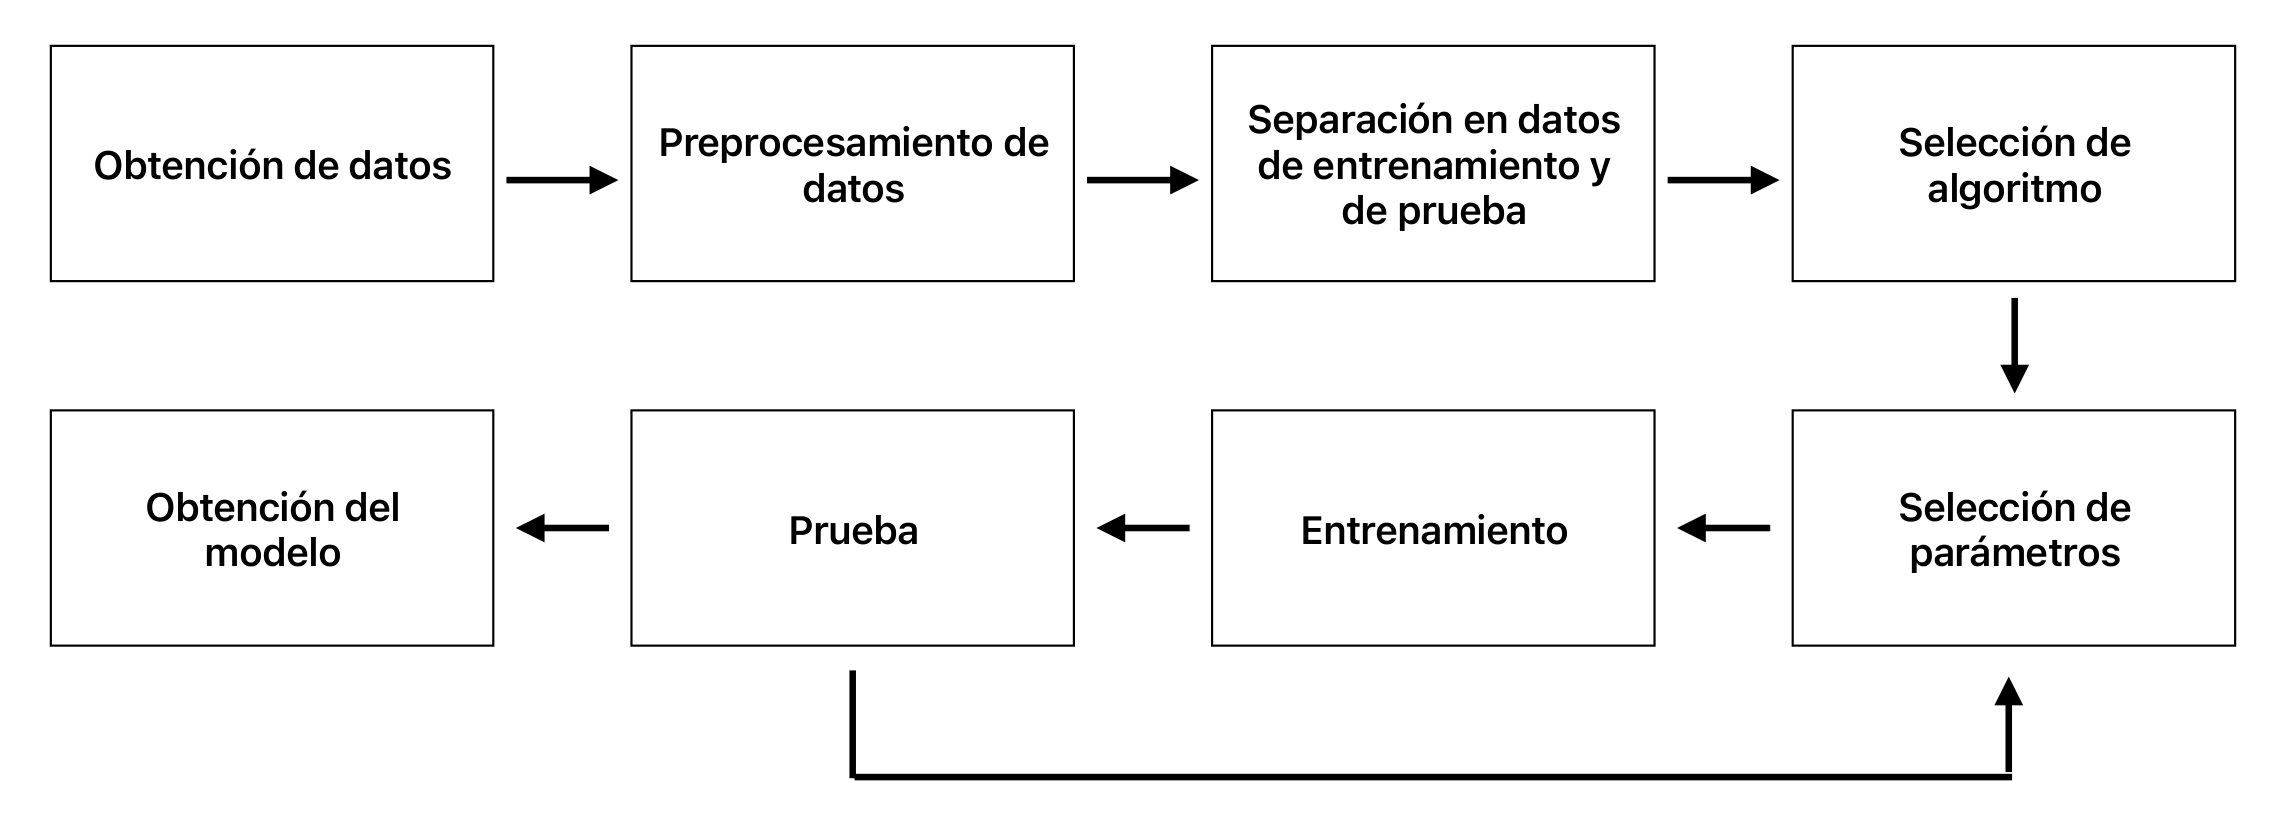

## Obtención de datos

- Van a tomar 4 fotos diferentes del conjunto de figuras que les tocaron.
- Las van a guardar en la carpeta del proyecto, por ejemplo: La primera foto le ponen F1.jpg y la guardan en una carpeta que se llame F1.

## Procesamiento de imágenes

Lo primero será importar las bibliotecas en nuestro nuestro script:

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn import metrics 
from IPython.display import display, Image
from PIL import Image

Del paso 1 al paso 3 se va a repetir 4 veces, 1 vez por cada imagen.

### Paso 1: Leer la imagen

El primer paso es procesar la imágenes que ya obtuvieron con la cámara y vamos a leer en escala de grises.

ATENCIÓN:

*Nota: Deben cambiar la ubicación y el nombre con el que guardaron sus imágenes. :)*

La imagen tiene 480 filas y 640 columnas
Imagen en escala de grises


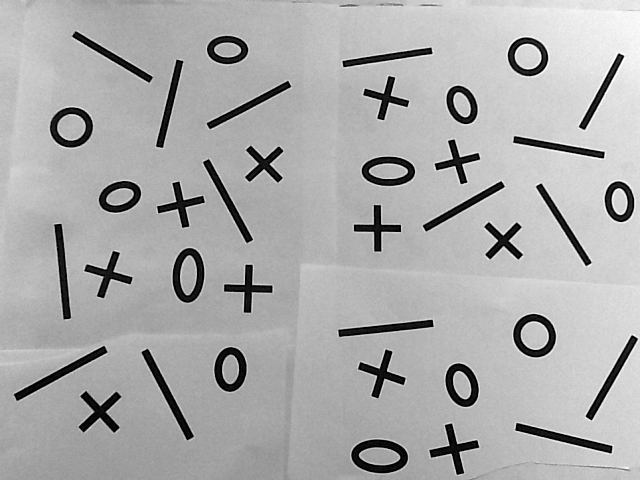

In [43]:
Carpeta = "I1"
Foto = "1.png"
nombre = Carpeta+"/"+Foto
parametro = cv2.IMREAD_GRAYSCALE
Img1 = cv2.imread( nombre, parametro )
rows, cols = Img1.shape
print("La imagen tiene {} filas y {} columnas".format(rows, cols))


print("Imagen en escala de grises")
display(Image.fromarray(Img1))

### Paso 2: Binarización de la imagen
<a id="binarizar"></a>
Ahora vamos binarizar la imagen, para eso es necesario buscar un umbral con el que las figuras de la imagen que leímos se ven completamente blancas.

_Debes buscar cuáles son los mejores valores para los umbrales._ 

Imagen binarizada


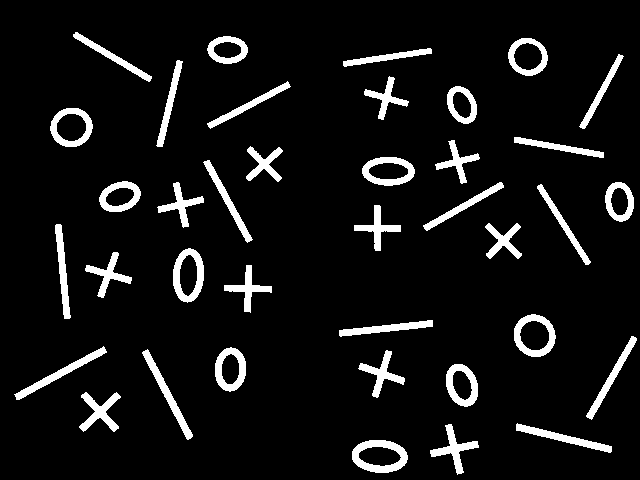

In [47]:
limInferior = 60
limSuperior = 255

ret,thresh1 = cv2.threshold(Img1,limInferior, limSuperior,cv2.THRESH_BINARY_INV)

ruido = False

if ruido:
    tam = 3
    kernel = np.ones((tam,tam), np.uint8)
    thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
    thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

print("Imagen binarizada")
display(Image.fromarray(thresh1))

### Paso 3 : Extracción de figuras de la imagen
<a id="extraccion"></a>
Ahora debemos extraer todas las figuras de nuestra imagen binarizada.

ATENCIÓN:

_Debes verificar la carpeta en donde se van a guardar las imágenes._

In [31]:
n, Labels, stats, centroids = cv2.connectedComponentsWithStats( thresh1 )

print( "Se encontraron {} figuras".format(n) )
momentos = np.zeros((n-1, 7))

print("Los momentos de Hu de cada figura son los siguientes:")

i = 1
while i < n :
    #Se obtiene el perimetro
    x1 =  stats[i, cv2.CC_STAT_LEFT]
    y1 =  stats[i, cv2.CC_STAT_TOP]
    x2 = x1 + stats[i,cv2.CC_STAT_WIDTH]
    y2 = y1 + stats[i,cv2.CC_STAT_HEIGHT]
    #Se toman las esquinas de un rectangulo de la imagen binarizada y solo se analiza esa región
    Img2 = thresh1[y1:y2,x1:x2]
    mu = cv2.moments( Img2, True )
    hu = cv2.HuMoments(mu)
    momentos[i-1, :] = hu[:, 0]
    print("Figura {}".format(i))
    j=0
    while j < 7 :
        print( "{0:.05g}".format( hu[j,0] ), end=" " )
        j += 1
    print( )
        
    #display(Image.fromarray(Img2))
    #print(Img2)

    nombre = Carpeta+"/{0:02d}.png".format(i)
    cv2.imwrite( nombre, thresh1[y1:y2,x1:x2] )
    i += 1

nombreHU=Carpeta+"/momentosHu.txt"
np.savetxt(nombreHU, momentos, fmt='%1.7f')
    

Se encontraron 39 figuras
Los momentos de Hu de cada figura son los siguientes:
Figura 1
1.1973 1.4058 0.00017832 0.00016129 2.7353e-08 0.00018943 -2.476e-10 
Figura 2
0.3833 0.016547 9.1734e-06 1.6161e-06 -5.9328e-12 -1.9619e-07 1.8773e-12 
Figura 3
0.5049 0.004021 0.00017131 0.0005384 -1.6193e-07 -3.382e-05 2.2656e-08 
Figura 4
1.2681 1.5805 0.00036974 0.00030656 1.0317e-07 0.00036815 -2.9925e-09 
Figura 5
1.198 1.4024 0.020548 0.02079 0.0004297 0.024533 -3.4589e-07 
Figura 6
1.1608 1.3196 7.1163e-05 2.3056e-05 7.9835e-10 1.328e-05 4.8453e-10 
Figura 7
0.35157 0.00018295 4.3496e-05 1.5573e-06 2.7912e-12 1.7225e-08 1.2509e-11 
Figura 8
1.2394 1.5082 0.00012433 1.3822e-05 -5.6992e-10 -1.6933e-05 -5.9298e-11 
Figura 9
0.39123 0.014951 1.8498e-07 2.0427e-06 8.8153e-13 8.596e-08 -8.9425e-13 
Figura 10
0.45505 0.00095146 2.199e-06 2.0388e-06 -4.1696e-12 -5.3149e-08 -1.1184e-12 
Figura 11
1.3146 1.6999 3.621e-05 3.1794e-05 1.0786e-09 3.9853e-05 -1.9082e-11 
Figura 12
0.35081 0.00028707 8.40

## Etiquetar los datos obtenidos
-  Una vez termines de rotar las imagenes, deberás tener 3 carpetas (con el nombre que hayas decidido) con todas las imágenes de las figuras que extrajiste y también 3 archivos donde están guardados los momentos de Hu.
- Deben abrir la carpeta donde estén todas las imágenes:
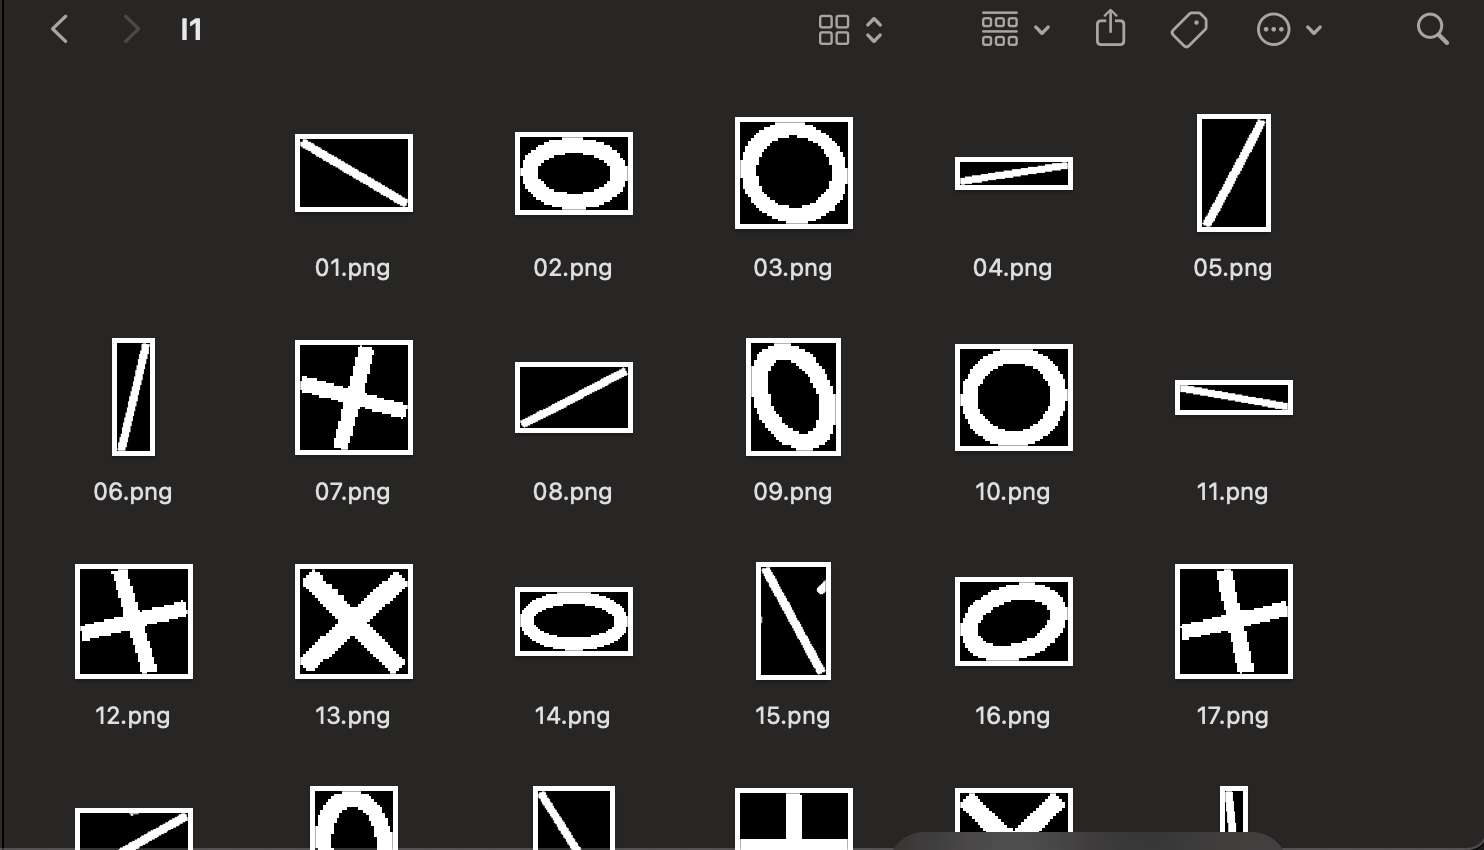
- Y también deben abrir el archivo en donde se guardaron los momentos de Hu:
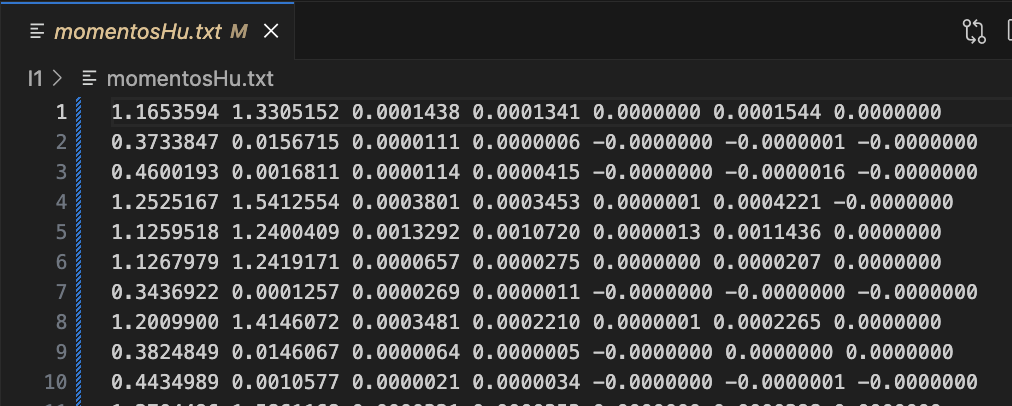
- Ahora vamos a asignarle a cada figura una etiqueta, por ejemplo en la imagen vemos que hay cuatro figuras, una línea, una cruz, un círculo y una elipse. Por lo tanto podemos asignarle las siguientes etiquetas linea = 0, cruz = 1, circulo = 2 y elipse = 3. Una vez hecho esto vamos a agregar una columna más, al archivo donde se encuentran los momentos, estos se encuentran guardados en el orden que se fueron encontrando las figuras, es decir la figura 01 corresponde al primer renglón del archivo y así sucesivamente. El archivo final se verá de la siguiente forma, te recomiendo renombrarlo como Datos.txt:
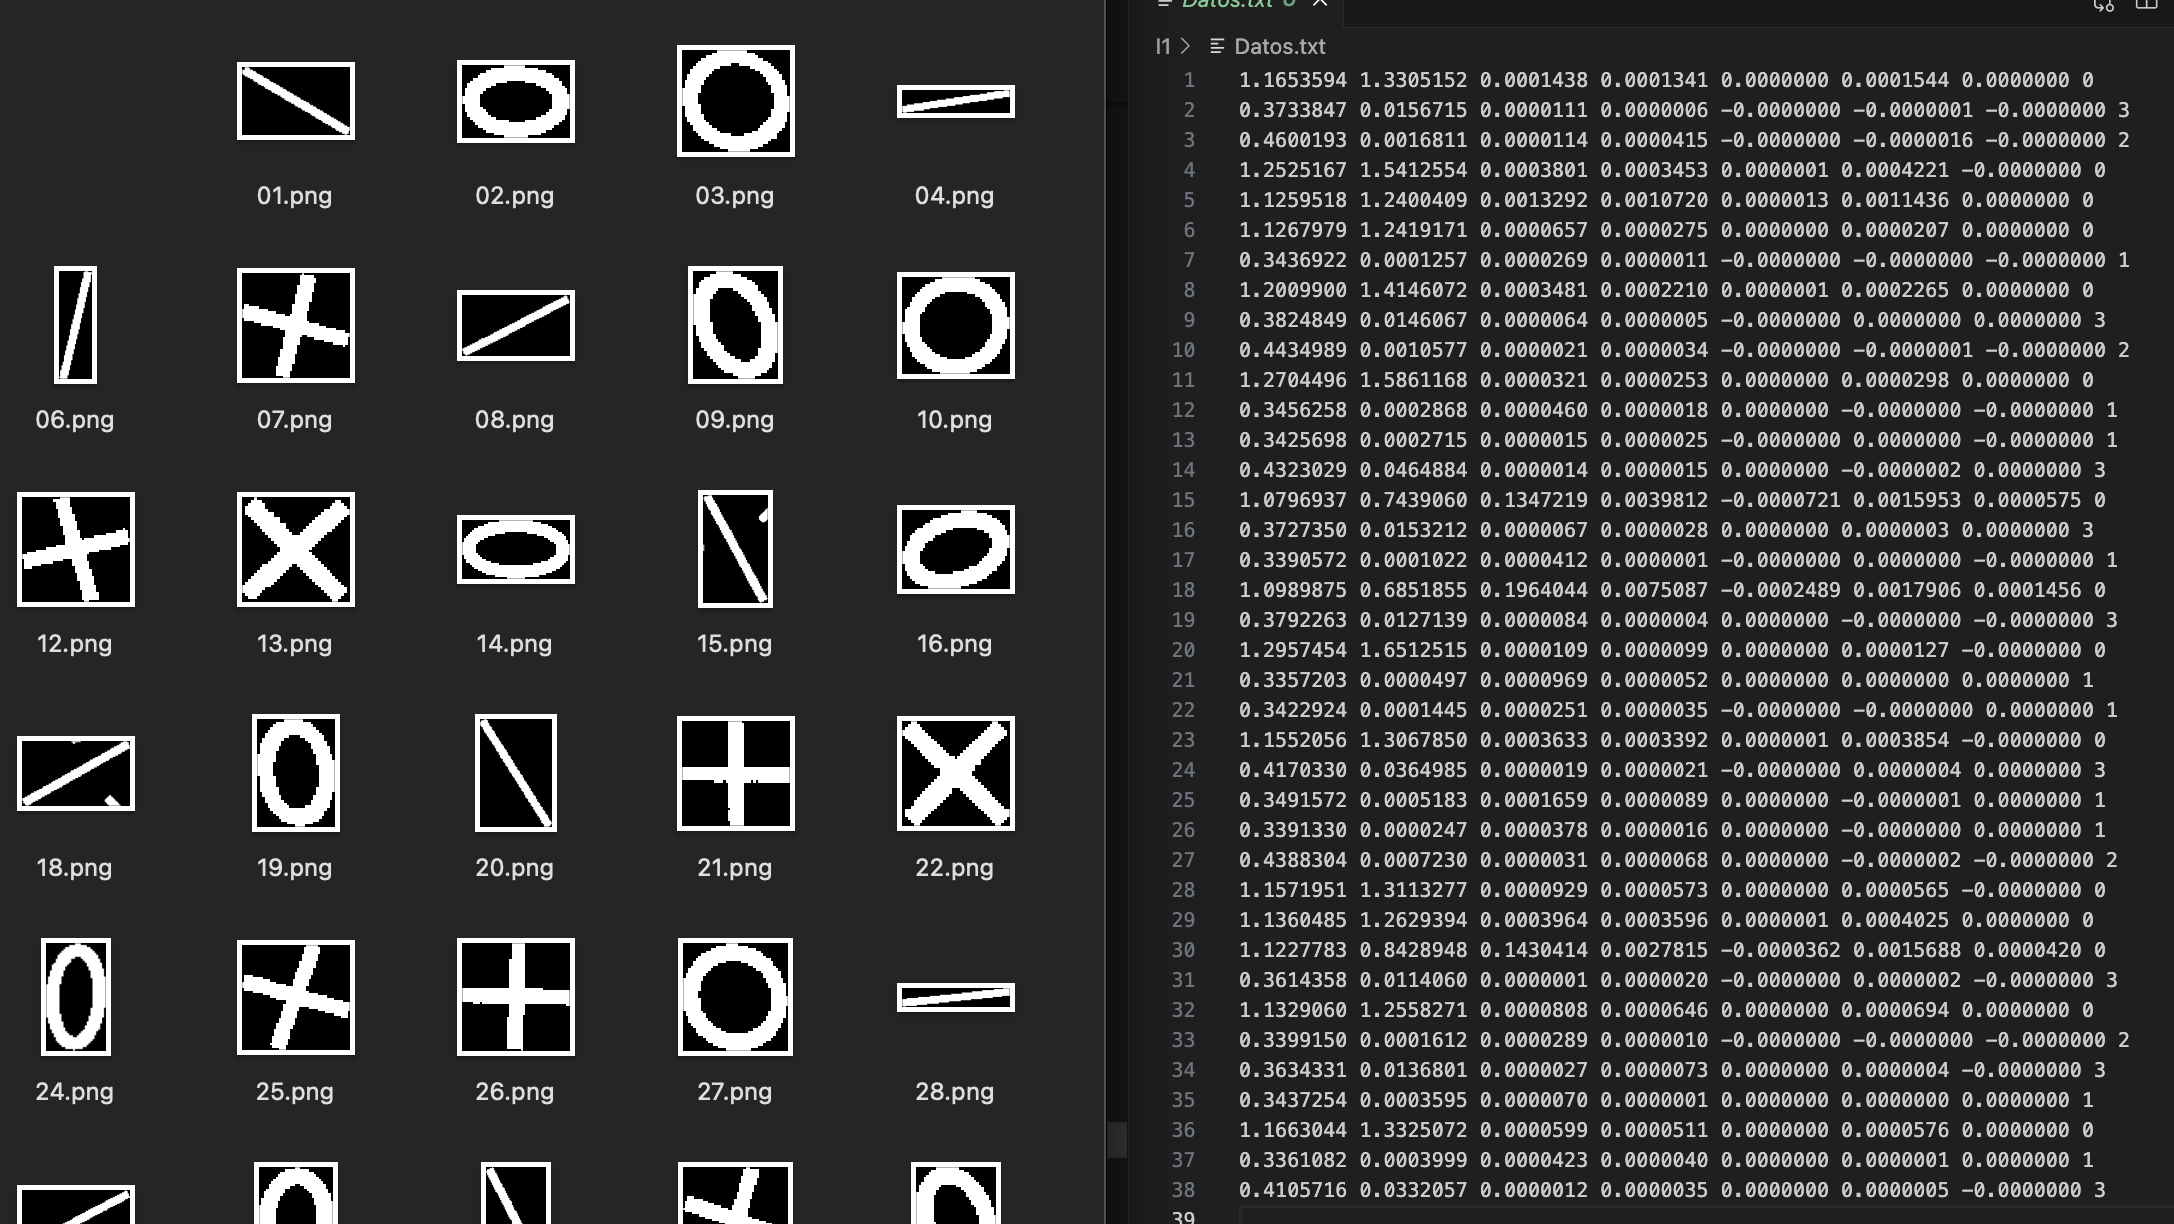
- Este proceso de etiquetado lo van a realizar para las 3 carpetas con imágenes que se generaron después de las rotaciones y la extracción de características. [Extracción](#extraccion)

## Generación de los conjuntos de entrenamiento y prueba

Para este punto debes tener 1 archivo de datos en cada carpeta, en total serán 4. Con estos datos vamos a crear nuestros conjuntos de entrenamiento.

In [32]:
Direccion1 = "I1/Datos.txt"
Direccion2 = "I2/Datos.txt"
Direccion3 = "I3/Datos.txt" 

Datos1 = np.loadtxt(Direccion1)
print("El conjunto de datos número 1 tiene {}".format(Datos1.shape[0]))

Datos2 = np.loadtxt(Direccion2)
print("El conjunto de datos número 2 tiene {}".format(Datos2.shape[0]))

Datos3 = np.loadtxt(Direccion3)
print("El conjunto de datos número 3 tiene {}".format(Datos3.shape[0]))

print(Datos2.shape)
print(Datos1.shape)

tmp = np.vstack((Datos1, Datos2))
tmp = np.vstack((tmp, Datos3))

Xtodo = tmp[:, 0:7]
ytodo = tmp[:, 7]



Xentrena, Xprueba, yentrena, yprueba = model_selection.train_test_split( Xtodo, ytodo, test_size = 0.2, random_state = 42 )
print("Este es el tamaño de el conjunto de entrenamiento: ")
print(Xentrena.shape)
print("Este es el tamaño de el conjunto de prueba: ")
print(Xprueba.shape)

np.savetxt("Datos/EntrenamientoX.txt", Xentrena, fmt='%1.7f')
np.savetxt("Datos/EntrenamientoY.txt", yentrena, fmt='%1.7f')
np.savetxt("Datos/PruebaX.txt", Xprueba, fmt='%1.7f')
np.savetxt("Datos/PruebaY.txt", yprueba, fmt='%1.7f')

El conjunto de datos número 1 tiene 38
El conjunto de datos número 2 tiene 34
El conjunto de datos número 3 tiene 34
(34, 8)
(38, 8)
Este es el tamaño de el conjunto de entrenamiento: 
(84, 7)
Este es el tamaño de el conjunto de prueba: 
(22, 7)


## Reducción de dimensionalidad 


(84, 3)


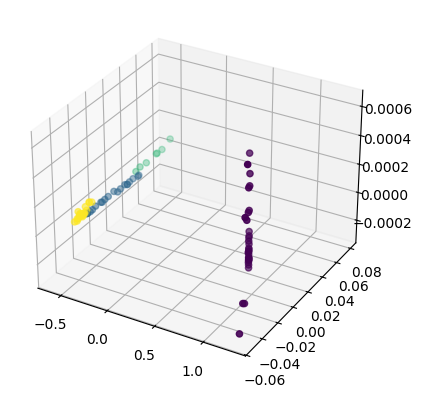

In [33]:
pca = PCA(n_components=3)
n = pca.fit_transform(Xentrena)
print(n.shape)

fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.scatter3D(n[:,0], n[:,1], n[:,2], c=yentrena)
plt.show()

(84, 2)


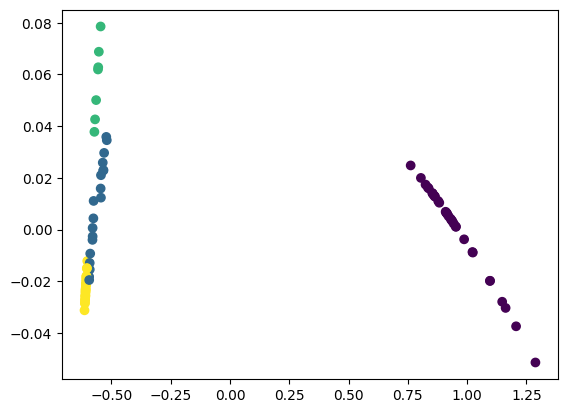

In [34]:
pca = PCA(n_components=2)
n = pca.fit_transform(Xentrena)
print(n.shape)

fig = plt.figure()
ax = plt.axes()
ax.scatter(n[:,0], n[:,1], c=yentrena)
plt.show()

## Entrenamiento de una Red Neuronal
Aquí vas elegir los parámetros de forma manual para entrenar tu clasificador utilizando una red neuronal. Esto suele ser una tarea complicada, ya que a veces no es sencillo encontrar los mejores parámetros, porque no puedes predecir que efecto tendrá en toda la red ese cambio, puedes mejorar o empeorar completamente el resuldado.

Pero vamos a intentarlo, tal vez los encuentres de forma manual, los parámetros que puedes modificar son los siguientes:

- El parámetro *capas*, te va a permitir seleccionar cuantas capas ocultas y el tamaño de estas, no existe una regla para seleccionarlas, pero puedes probar incementando, cuida que la red no sea muy grande recuerda que son operaciones matriciales.
- El parámetro *semilla*, te va a permitir controlar como se inicializan los pesos dentro de la red.
- El parámetro *activacion*

La meta es obetener al menos 0.90 o más en la exactitud de las pruebas.

In [35]:
capas = (100,4)
semilla = 8
# relu, tanh
activacion = 'tanh'
red = MLPClassifier(hidden_layer_sizes=capas, random_state=semilla, max_iter=10000)
print(red)
print("Entrenando la red ... ")
red.fit(Xentrena, yentrena)

ypredichas = red.predict(Xentrena)
exactitud = metrics.accuracy_score(yentrena, ypredichas)
print("La exactitud del entrenamiento es {}".format(exactitud))

ypredichas = red.predict(Xprueba)
exactitud = metrics.accuracy_score(yprueba, ypredichas)
print("La exactitud de la pruebas es {}".format(exactitud))


MLPClassifier(hidden_layer_sizes=(100, 4), max_iter=10000, random_state=8)
Entrenando la red ... 
La exactitud del entrenamiento es 0.9047619047619048
La exactitud de la pruebas es 0.8636363636363636


### Búsqueda en malla para sintonizar los parámetros de la red

La búsqueda en malla nos va permitir que de una forma sistematica se prueben diferentes combinaciones de parámetros y se obtendrán las estadísticas para seleccionar cuál es la mejor opción, para este problema en especifico.

El problema con esta técnica es que es difícil abarcar todas las posibles combinaciones, funciona bien si se tiene en mente exactamente bajo que criterios se quiere optimizar la red. Cuando no se tiene tan acotado el problema se pueden utilizar otro tipo de técnicas donde se busca también la mejor arquitectura y la optimización de los pesos.

*Van a salir unas advertencias de convergencia, no hay de que asustarse. :)*


In [36]:
parameter_space = {
    'hidden_layer_sizes': [(16,8),(10,4), (8, 4)],
    'activation': ['tanh', 'relu', 'logistic'],
    'random_state': [0,1 ,2, 3, 4],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

red_malla = MLPClassifier(max_iter=10000000)
clf = GridSearchCV(red_malla, parameter_space, n_jobs=-1, cv=5)
clf.fit(Xentrena, yentrena)
print("Los mejores parámetros para esta red son los siguientes: {}".format(clf.best_params_))

Los mejores parámetros para esta red son los siguientes: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 8), 'learning_rate': 'constant', 'random_state': 0, 'solver': 'lbfgs'}


In [37]:
print(" Aquí podemos ver las estadísticas de todas las combinaciones:  \n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
#Se va imprimir el promedio y la desviación estandar
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) para %r" % (mean, std * 2, params))

 Aquí podemos ver las estadísticas de todas las combinaciones:  



In [38]:
print("Entrenando la red con los mejores parámetros encontrados... ")

activacion = clf.best_params_['activation']
capas = clf.best_params_['hidden_layer_sizes']
semilla = clf.best_params_['random_state']
alfa = clf.best_params_['alpha']
tasa = clf.best_params_['learning_rate']
entrenamiento = clf.best_params_['solver']

red_optimizada = MLPClassifier(hidden_layer_sizes= capas, 
                               random_state= semilla,
                               solver = entrenamiento, 
                               alpha = alfa,
                               learning_rate = tasa,
                               activation = activacion,
                               max_iter=10000)
red_optimizada.fit(Xentrena, yentrena)

ypredichas = red_optimizada.predict(Xprueba)
exactitud = metrics.accuracy_score(yprueba, ypredichas)
print("La exactitud de la pruebas es {}".format(exactitud))

Entrenando la red con los mejores parámetros encontrados... 
La exactitud de la pruebas es 1.0


Extracción de coeficientes para guardar el modelo:

In [39]:
capas_ocultas = len(red_optimizada.coefs_)
for i in range(capas_ocultas):
    print("Capa {} ".format((i+1)))
    print("Tamaño: {}".format(red_optimizada.coefs_[i].shape))
    print("Pesos: \n{} ".format(red_optimizada.coefs_[i]))
    print("Sesgos: {}".format(red_optimizada.intercepts_[i]))

Capa 1 
Tamaño: (7, 16)
Pesos: 
[[-1.77168054  2.32393054  1.39014082  1.69892999 -0.5052007  -1.24152688
  -2.60240623  1.47304801 -0.48927839 -0.3465177   0.65156656 -0.2288592
   0.56130166  0.42006828 -0.94783647 -0.99339963]
 [-2.40139005  3.34218573  1.37998381  3.78247082  0.69422639  8.79711028
  -3.07999783  1.85754992 -2.85554002  0.05930537 -5.7508787   0.47564321
  -2.77820638  1.18510997 -0.14577881 -0.48773632]
 [-0.02451236  0.04592739 -0.47307622  0.09386981  0.10989553  0.08175436
   0.43702014  0.17625833 -0.1367472  -0.0612014   0.19492427 -0.43149955
   0.16300726  0.16777122 -0.28342331 -0.36409464]
 [-0.18111048 -0.13395163  0.06916242 -0.06053326  0.47943704 -0.39244011
  -0.28607724 -0.33283379  0.15019012 -0.24221519 -0.03318982 -0.25068166
  -0.33495126 -0.38233421  0.15346963 -0.35517911]
 [-0.29787675 -0.12887754  0.31513142 -0.39554114  0.3317735  -0.39652567
   0.4677585  -0.03077631  0.46805463  0.10293088  0.234894   -0.45239703
  -0.21322682 -0.3728676 

### Prueba del modelo

Vamos a cargar una imagen con la que no se entreno el modelo y vamos a clasificar las figuras que están en la imgen y vamos pintar en la imagen dependiendo la figura con diferentes colores.


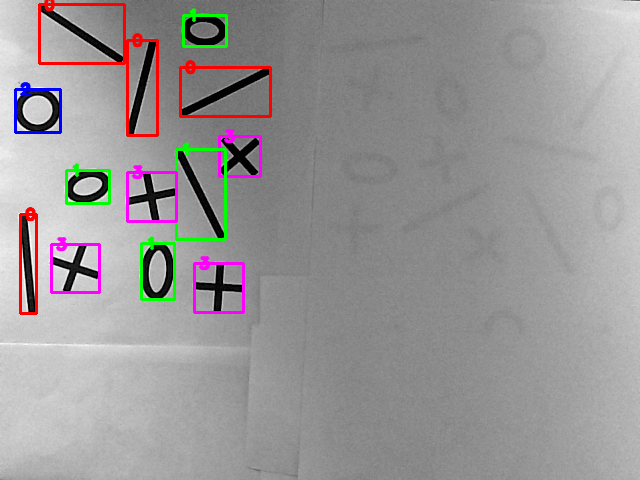

In [40]:
nombre = "FotoPrueba/Prueba1.png"

font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 0.5

thickness = 2

ImgColor = cv2.imread( nombre)
Img1 = cv2.imread( nombre, cv2.IMREAD_GRAYSCALE )

limInferior = 45
limSuperior = 255

ret,thresh1 = cv2.threshold(Img1,limInferior, limSuperior,cv2.THRESH_BINARY_INV)

n, Labels, stats, centroids = cv2.connectedComponentsWithStats( thresh1 )
i = 1
while i < n :
    #Se obtiene el perimetro
    x1 =  stats[i, cv2.CC_STAT_LEFT]
    y1 =  stats[i, cv2.CC_STAT_TOP]
    x2 = x1 + stats[i,cv2.CC_STAT_WIDTH]
    y2 = y1 + stats[i,cv2.CC_STAT_HEIGHT]
    #Se toman las esquinas de un rectangulo de la imagen binarizada y solo se analiza esa región
    Img2 = thresh1[y1:y2,x1:x2]
    mu = cv2.moments( Img2, True )
    hu = cv2.HuMoments(mu)
    #print(hu.shape)
    #print(hu.T)
    ypredicha = red_optimizada.predict(hu.T)
    
    if(ypredicha == 0):
        color = (255, 0, 0)
        MCor = cv2.putText(ImgColor, '0', (x1+5,y1+5), font, fontScale, color, thickness, cv2.LINE_AA) 
    if(ypredicha == 1):
        color = (0, 255, 0)
        MCor = cv2.putText(ImgColor, '1', (x1+5,y1+5), font, fontScale, color, thickness, cv2.LINE_AA)
    if(ypredicha == 2):
        color = (0, 0, 255)
        MCor = cv2.putText(ImgColor, '2', (x1+5,y1+5), font, fontScale, color, thickness, cv2.LINE_AA)
    if(ypredicha == 3):
        color = (255, 0, 255)
        MCor = cv2.putText(ImgColor, '3', (x1+5,y1+5), font, fontScale, color, thickness, cv2.LINE_AA)
    start_point = (x1, y1)
    end_point = (x2, y2)
            
    thickness = 2
    MCor = cv2.rectangle(ImgColor, start_point, end_point, color, thickness)
    i = i + 1

display(Image.fromarray(MCor))


In [41]:

nombre = 'MiModelo.sav'
joblib.dump(red_optimizada, nombre)

['MiModelo.sav']